Loading necessary libraries below.  
If you do not have the libraries installed on your machine you will need to install them by using
 
 pip install pandas
 
 pip install numpy
 
 pip install matplotlib.pyplot
 
 in your terminal.


In [10]:
# importing  modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



Importing csv file using the Pandas library while using the read_csv function within the library.
Setting dataframe to max columns and clensing the dataframe.


In [11]:
#setting dataframe to max columns and clensing the dataframe
#This dataframe is to get the stats needed

pd.set_option('display.max_columns', 500)
df = pd.read_csv('batting1990-95.csv',na_values=['#DIV/0!'])
#df.loc[(df!=0.00).any(axis=1)]
df = df.replace('NaN', np.nan)
df =df.dropna()

df


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,IBB,HBP,SH,SF,GIDP
3,abnersh01,1990,1,SDN,NL,91,184,17,45,9,0,1,15,2,3,9,28,0.245,1,2,2,1,3
6,afenitr01,1990,1,OAK,AL,14,14,0,2,0,0,0,2,0,0,0,6,0.143,0,0,0,1,0
7,agostju01,1990,1,HOU,NL,82,2,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0,0
9,akerfda01,1990,1,PHI,NL,71,6,0,1,0,0,0,0,0,0,0,3,0.167,0,0,0,0,0
10,aldremi01,1990,1,MON,NL,96,161,22,39,7,1,1,18,1,2,37,31,0.242,2,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6725,youngke01,1995,1,PIT,NL,56,181,13,42,9,0,6,22,1,3,8,53,0.232,0,2,1,3,5
6726,zaungr01,1995,1,BAL,AL,40,104,18,27,5,0,3,14,1,1,16,14,0.260,0,0,2,0,2
6727,zeileto01,1995,1,SLN,NL,34,127,16,37,6,0,5,22,1,0,18,23,0.291,1,1,0,2,2
6728,zeileto01,1995,2,CHN,NL,79,299,34,68,16,0,9,30,0,0,16,53,0.227,0,3,4,3,11


In [12]:
#Testing to see if i can pullout specific year.

year_1990 = (df['yearID' ]) ==1990 

df.loc[year_1990, ['playerID','BA' ]]


,playerID,BA
3,abnersh01,0.245
6,afenitr01,0.143
7,agostju01,0.000
9,akerfda01,0.167
10,aldremi01,0.242
...,...,...
1106,yeldier01,0.254
1108,yorkmi01,0.333
1111,youngge02,0.175
1113,yountro01,0.247


In [13]:
# Reading in another csv file to get needed names to match playerID.
pd.set_option('display.max_columns', 500)
df_people = pd.read_csv('people1990-95.csv' )

df_people

,playerID,nameLast,nameGiven,debut
0,deshide01,DeShields,Delino Lamont,1990
1,hiltoho01,Hilton,Howard James,1990
2,layanti01,Layana,Timothy Joseph,1990
3,radinsc01,Radinsky,Scott David,1990
4,rohdeda01,Rohde,David Grant,1990
...,...,...,...,...
1082,persoro01,Person,Robert Alan,1995
1083,thobejj01,Thobe,John Joseph,1995
1084,benesal01,Benes,Alan Paul,1995
1085,roajo01,Roa,Joseph Rodger,1995


In [14]:
# Pulling out columns of data to see if its correct compared to csv file.

df_people[['playerID', 'nameLast', 'debut'] ]


,playerID,nameLast,debut
0,deshide01,DeShields,1990
1,hiltoho01,Hilton,1990
2,layanti01,Layana,1990
3,radinsc01,Radinsky,1990
4,rohdeda01,Rohde,1990
...,...,...,...
1082,persoro01,Person,1995
1083,thobejj01,Thobe,1995
1084,benesal01,Benes,1995
1085,roajo01,Roa,1995


In [15]:

# Merged both above csv files. Calling the new dataframe comb_df.

pd.set_option('display.max_columns', None)
comb_df = pd.merge( df,df_people, on=['playerID'])
comb_df.dropna()
comb_df.fillna(0, inplace = True)

comb_df[0:100]



,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,IBB,HBP,SH,SF,GIDP,nameLast,nameGiven,debut
0,aloumo01,1990,1,PIT,NL,2,5,0,1,0,0,0,0,0,0,0,0,0.200,0,0,0,0,1,Alou,Moises Rojas,1990
1,aloumo01,1990,2,MON,NL,14,15,4,3,0,1,0,0,0,0,0,3,0.200,0,0,1,0,0,Alou,Moises Rojas,1990
2,aloumo01,1992,1,MON,NL,115,341,53,96,28,2,9,56,16,2,25,46,0.282,0,1,5,5,5,Alou,Moises Rojas,1990
3,aloumo01,1993,1,MON,NL,136,482,70,138,29,6,18,85,17,6,38,53,0.286,9,5,3,7,9,Alou,Moises Rojas,1990
4,aloumo01,1994,1,MON,NL,107,422,81,143,31,5,22,78,7,6,42,63,0.339,10,2,0,5,7,Alou,Moises Rojas,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,cuylemi01,1991,1,DET,AL,154,475,77,122,15,7,3,33,41,10,52,92,0.257,0,5,12,2,4,Cuyler,Milton,1990
96,cuylemi01,1992,1,DET,AL,89,291,39,70,11,1,3,28,8,5,10,62,0.241,0,4,8,0,4,Cuyler,Milton,1990
97,cuylemi01,1993,1,DET,AL,82,249,46,53,11,7,0,19,13,2,19,53,0.213,0,3,4,1,2,Cuyler,Milton,1990
98,cuylemi01,1994,1,DET,AL,48,116,20,28,3,1,1,11,5,3,13,21,0.241,0,1,2,2,3,Cuyler,Milton,1990


In [16]:
# Checking to see what is identifiers are in lgID column
comb_df.lgID.unique()



array(['NL', 'AL'], dtype=object)

In [17]:
#Creating a new DF series called comb_df_sv to only have NL players
comb_df_data_list = ['NL']
comb_df_sv = comb_df[comb_df.lgID. isin(comb_df_data_list)]
comb_df_sv


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,IBB,HBP,SH,SF,GIDP,nameLast,nameGiven,debut
0,aloumo01,1990,1,PIT,NL,2,5,0,1,0,0,0,0,0,0,0,0,0.200,0,0,0,0,1,Alou,Moises Rojas,1990
1,aloumo01,1990,2,MON,NL,14,15,4,3,0,1,0,0,0,0,0,3,0.200,0,0,1,0,0,Alou,Moises Rojas,1990
2,aloumo01,1992,1,MON,NL,115,341,53,96,28,2,9,56,16,2,25,46,0.282,0,1,5,5,5,Alou,Moises Rojas,1990
3,aloumo01,1993,1,MON,NL,136,482,70,138,29,6,18,85,17,6,38,53,0.286,9,5,3,7,9,Alou,Moises Rojas,1990
4,aloumo01,1994,1,MON,NL,107,422,81,143,31,5,22,78,7,6,42,63,0.339,10,2,0,5,7,Alou,Moises Rojas,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,valdema01,1995,1,FLO,NL,3,2,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0,0,Valdes,Marc Christopher,1995
1958,verasqu01,1995,1,FLO,NL,124,440,86,115,20,7,5,32,56,21,80,68,0.261,0,9,7,2,7,Veras,Quilvio Alberto,1995
1959,villoro01,1995,2,SDN,NL,19,1,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0,0,Villone,Ronald Thomas,1995
1961,walldo01,1995,1,HOU,NL,6,5,0,0,0,0,0,0,0,0,0,2,0.000,0,0,3,0,0,Wall,Donnell Lee,1995


In [23]:
year_1990 = (comb_df_sv['yearID'] ==1990)
                                          
ninetys=comb_df_sv.loc[year_1990, ['playerID','yearID','nameLast','nameGiven', 'BA','debut']][0:30]

ninetys

,playerID,yearID,nameLast,nameGiven,BA,debut
0,aloumo01,1990,Alou,Moises Rojas,0.200,1990
1,aloumo01,1990,Alou,Moises Rojas,0.200,1990
6,averyst01,1990,Avery,Steven Thomas,0.133,1990
21,baezke01,1990,Baez,Kevin Richard,0.167,1990
24,baldwje01,1990,Baldwin,Jeffrey Allen,0.000,1990
25,barnebr01,1990,Barnes,Brian Keith,0.000,1990
30,bellmi01,1990,Bell,Michael Allen,0.244,1990
44,boskish01,1990,Boskie,Shawn Kealoha,0.222,1990
49,brewero01,1990,Brewer,Rodney Lee,0.240,1990
56,carrch02,1990,Carr,Charles Lee Glenn,0.000,1990


In [24]:
year_1995 = (comb_df_sv['yearID'] ==1995) 
                                           
ninetyfive = comb_df_sv.loc[year_1995, ['playerID','nameLast','nameGiven','teamID', 'BA','debut']][0:25]
ninetyfive

,playerID,nameLast,nameGiven,teamID,BA,debut
5,aloumo01,Alou,Moises Rojas,MON,0.273,1990
11,averyst01,Avery,Steven Thomas,ATL,0.208,1990
37,berryse01,Berry,Sean Robert,MON,0.318,1990
61,carrch02,Carr,Charles Lee Glenn,FLO,0.227,1990
67,cedenan01,Cedeno,Andujar,SDN,0.210,1990
87,coninje01,Conine,Jeffrey Guy,FLO,0.302,1990
93,coopesc01,Cooper,Scott Kendrick,SLN,0.230,1990
104,deckest01,Decker,Steven Michael,FLO,0.226,1990
110,deshide01,DeShields,Delino Lamont,LAN,0.256,1990
114,deweyma01,Dewey,Mark Alan,SFN,0.000,1990


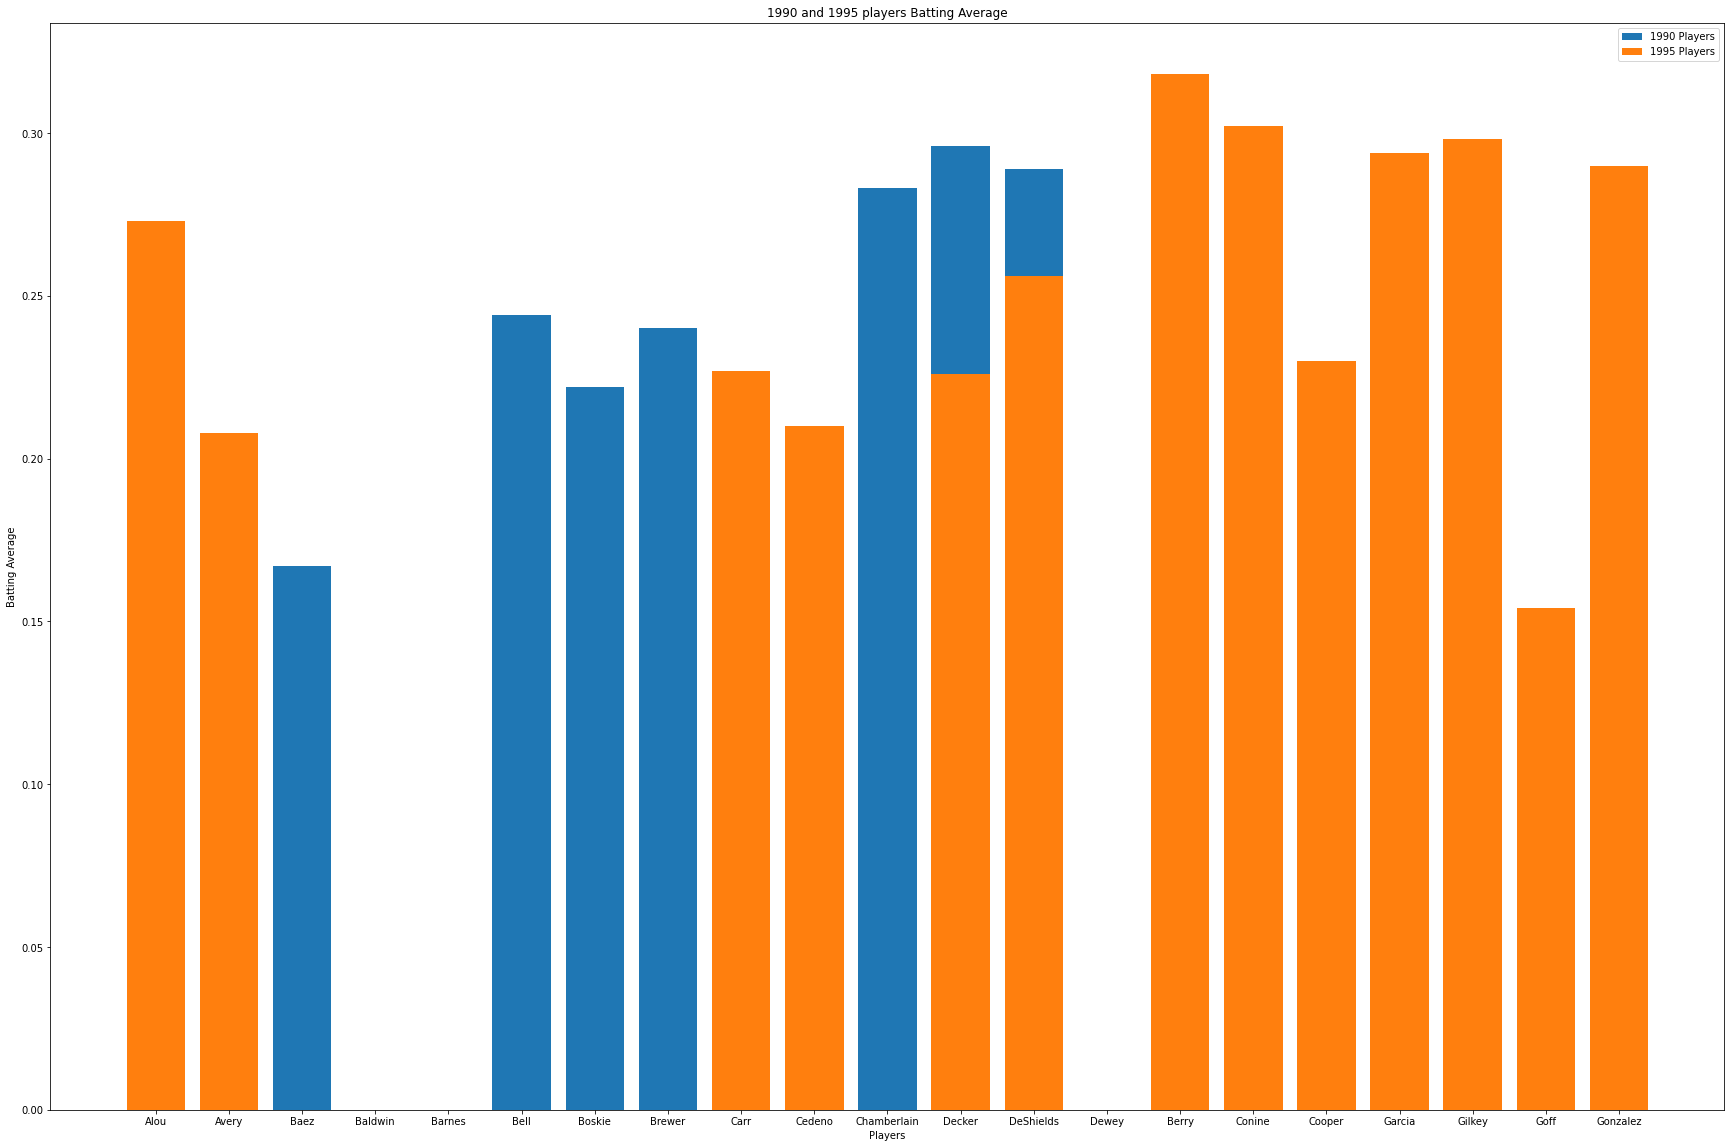

In [25]:
plt.figure(figsize=(30,20))
plt.title('1990 and 1995 players Batting Average')
plt.xlabel('Players')
plt.ylabel('Batting Average')
plt.bar(ninetys.head(15).nameLast ,  ninetys.head(15).BA, label= '1990 Players')
plt.bar(ninetyfive.head(15).nameLast , ninetyfive.head(15).BA, label= '1995 Players')

plt.legend()

plt.show()

In [19]:
# filtering out players that debut in 1990 and creating a new dataframe
year_1990 = (comb_df_sv['debut'] ==1990)
                                          
ninetysdebut=comb_df_sv.loc[year_1990, ['playerID','yearID','nameLast', 'BA','debut']]

ninetysdebut

,playerID,yearID,nameLast,BA,debut
0,aloumo01,1990,Alou,0.200,1990
1,aloumo01,1990,Alou,0.200,1990
2,aloumo01,1992,Alou,0.282,1990
3,aloumo01,1993,Alou,0.286,1990
4,aloumo01,1994,Alou,0.339,1990
...,...,...,...,...,...
1832,casiala01,1995,Casian,0.000,1990
1846,delucri01,1995,DeLucia,0.200,1990
1862,garceri01,1995,Garces,0.000,1990
1871,grahejo01,1995,Grahe,0.417,1990


In [22]:
#Dropping duplicate playerID's with multiple batting averages
ninetysdebut = ninetysdebut.drop_duplicates(subset = ['playerID','yearID', 'BA'], keep ='first')
ninetysdebut


,playerID,yearID,nameLast,BA,debut
0,aloumo01,1990,Alou,0.200,1990
2,aloumo01,1992,Alou,0.282,1990
3,aloumo01,1993,Alou,0.286,1990
4,aloumo01,1994,Alou,0.339,1990
5,aloumo01,1995,Alou,0.273,1990
...,...,...,...,...,...
1832,casiala01,1995,Casian,0.000,1990
1846,delucri01,1995,DeLucia,0.200,1990
1862,garceri01,1995,Garces,0.000,1990
1871,grahejo01,1995,Grahe,0.417,1990


<AxesSubplot:title={'center':' Players batting averages from 1990-1995'}, xlabel='Player Name', ylabel='Batting Average'>

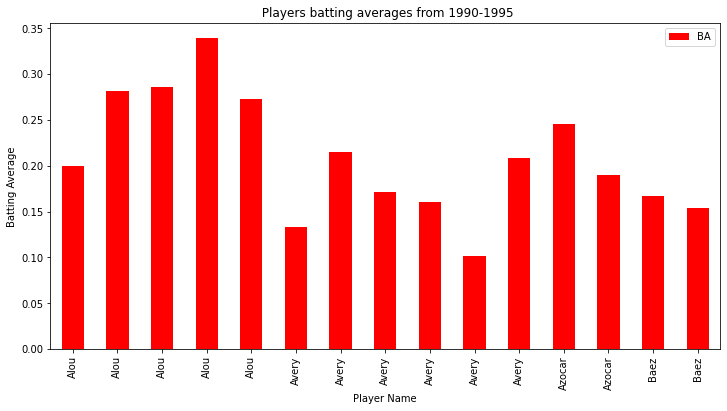

In [ ]:
#Example of simple bar chart of the fi1e names in the dataframe called ninetys.  Some data is missing because the player debut in the 90's
# but did not have any hits.


ninetysdebut.head(15).plot (kind='bar',
              x='nameLast',xlabel=('Player Name'),
              title = " Players batting averages from 1990-1995",
            y = 'BA',ylabel=('Batting Average') ,
              color = 'red',
            figsize=(12,6))
#plt.tick_params(labelsize=12)

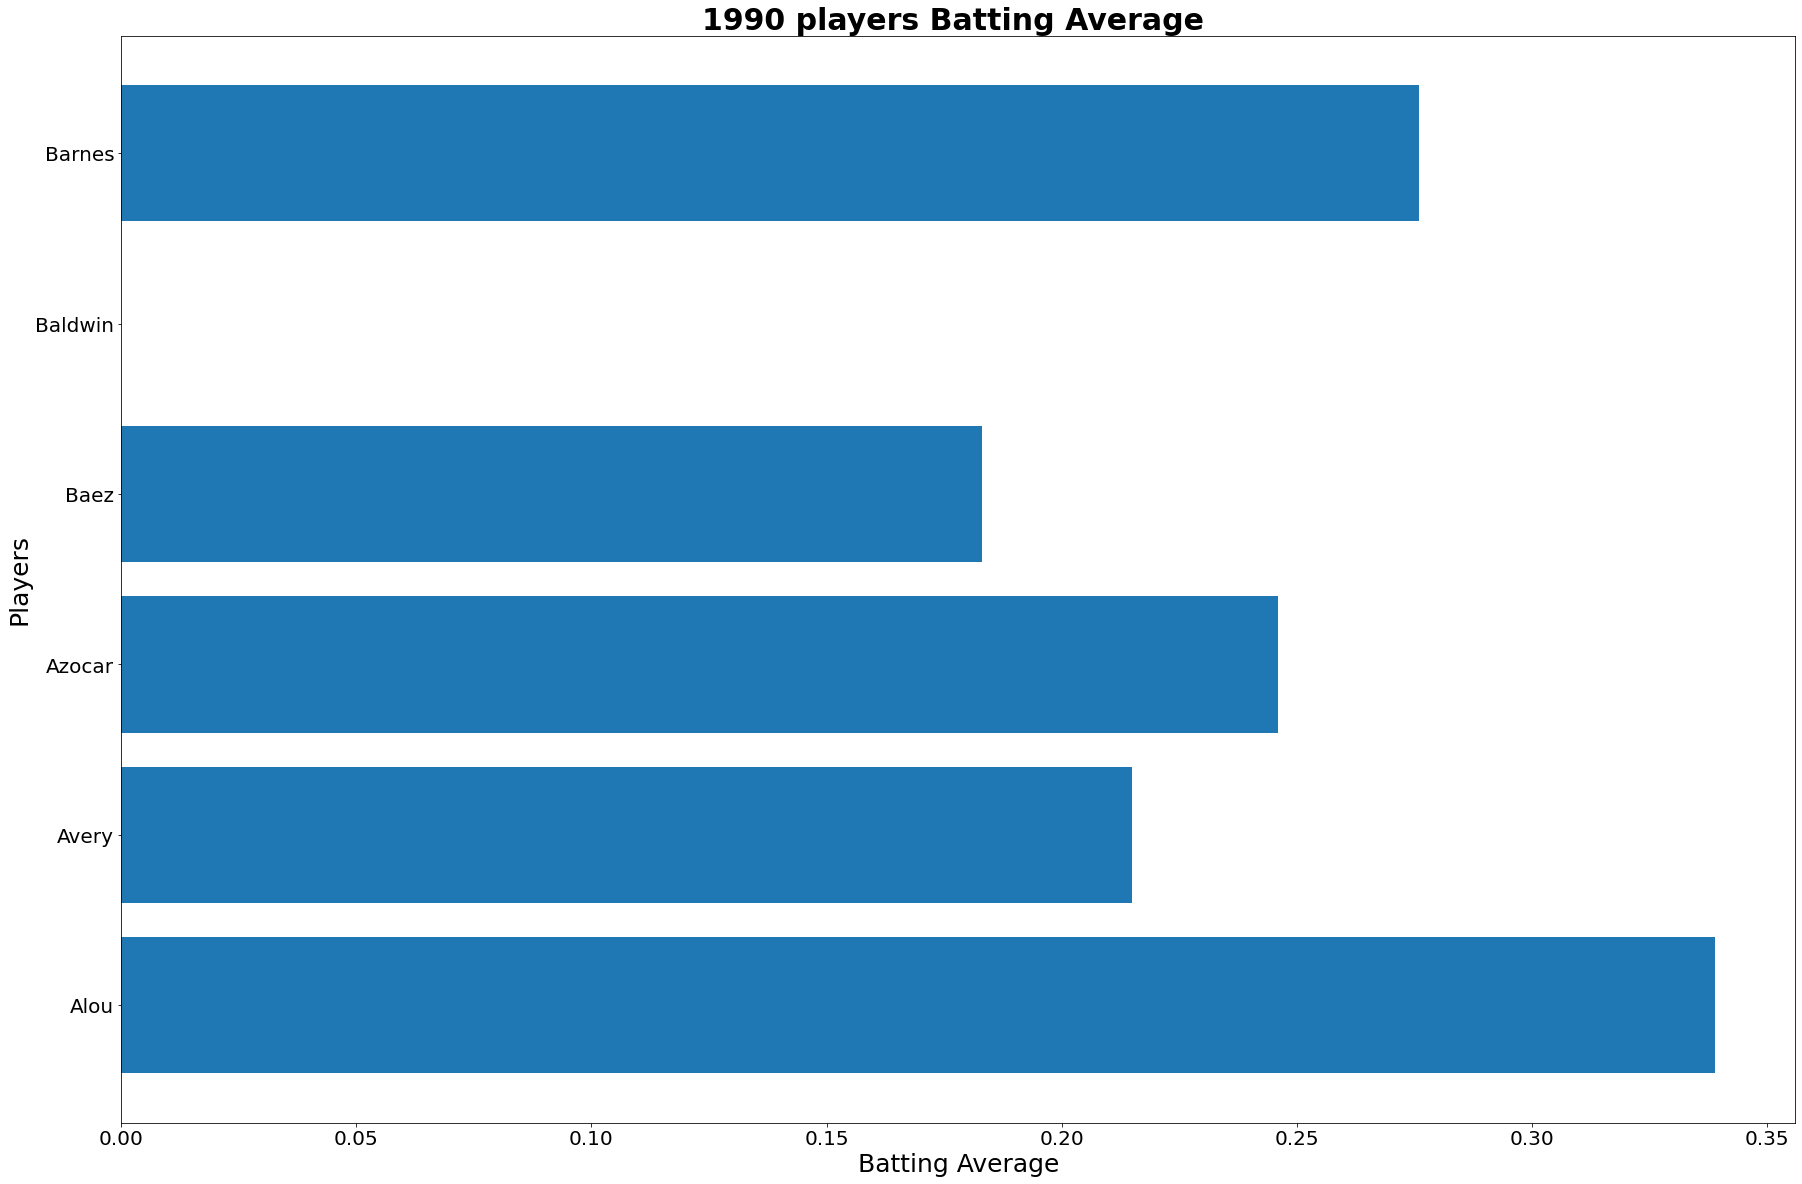

In [ ]:


plt.figure(figsize=(30,20))
plt.title('1990 players Batting Average ',fontdict={'fontweight' :'bold', 'fontsize' :30})
plt.ylabel('Players', fontsize =25)
plt.xlabel('Batting Average', fontsize =25)
plt.barh('nameLast', 'BA', data =ninetysdebut.head(20)) 
 
#plt.bar(comb_df_sv.head(15).nameLast , ninetys.head(15).BA, label= '1995 Players')
plt.tight_layout
#plt.legend()
plt.tick_params(labelsize=20)
plt.show()


